In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

### 한자리 숫자 학습

before w = [0.55] b = [0.72] y_hat = [2.9] 

iteration 1 :
y = 2 y_hat = [2.91] E = [0.41445]
dw = [3.64] = [0.91] * 4
w_old = [0.55] → w_new = [0.18]
db = [0.91]
b_old = [0.72] → b_new = [0.62]

iteration 2 :
y = 2 y_hat = [1.36] E = [0.20308]
dw = [-2.55] = [-0.64] * 4
w_old = [0.18] → w_new = [0.44]
db = [-0.64]
b_old = [0.62] → b_new = [0.69]

iteration 3 :
y = 2 y_hat = [2.45] E = [0.09951]
dw = [1.78] = [0.45] * 4
w_old = [0.44] → w_new = [0.26]
db = [0.45]
b_old = [0.69] → b_new = [0.64]

iteration 4 :
y = 2 y_hat = [1.69] E = [0.04876]
dw = [-1.25] = [-0.31] * 4
w_old = [0.26] → w_new = [0.39]
db = [-0.31]
b_old = [0.64] → b_new = [0.67]

iteration 5 :
y = 2 y_hat = [2.22] E = [0.02389]
dw = [0.87] = [0.22] * 4
w_old = [0.39] → w_new = [0.3]
db = [0.22]
b_old = [0.67] → b_new = [0.65]

iteration 6 :
y = 2 y_hat = [1.85] E = [0.01171]
dw = [-0.61] = [-0.15] * 4
w_old = [0.3] → w_new = [0.36]
db = [-0.15]
b_old = [0.65] → b_new = [0.67]

iteration 7 :
y = 2 y_hat = [2.11] E = [0.

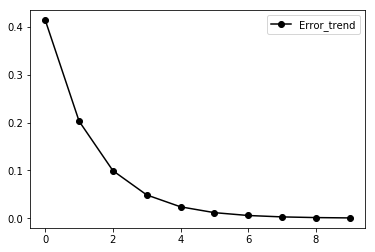

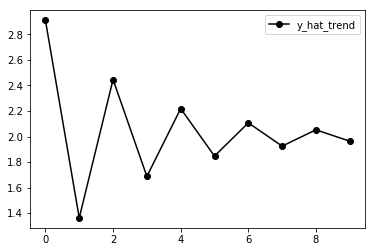

E = [0.0006749]


In [2]:
np.random.seed(0)
# x, y 지정
x = 4
y = 2
# 모든 w, b에 대해서 임의의 값으로 초기화
w = np.random.rand(1)
b = np.random.rand(1)
# 학습전 w와 b y_hat 출력
y_hat = w * x + b 
print("before w = {} b = {} y_hat = {} ".format(np.round(w,2),np.round(b,2),np.round(y_hat,1)))
print()
# 학습률 정의
alpha = 0.1

# 학습 과정을 저장하기 위한 리스트
error_trend = []
y_hat_trend = []
i = 1
while(True):
    # 단층 퍼셉트론 출력 계산
    y_hat = w * x + b
    # 오차 계산
    E = 0.5*(y - y_hat)**2
    
    print("iteration {} :".format(i))
    print("y = {} y_hat = {} E = {}".format(np.round(y,2),np.round(y_hat,2),np.round(E,5)))
    
    # 오차에 대한 기여율 계산
    de = -(y - y_hat)
    dw = de * x
    print("dw = {} = {} * {}".format(np.round(dw,2),np.round(de,2),np.round(x,2)))
    print("w_old = {} → ".format(np.round(w,2)),end = '')
    # w, b 학습
    w = w - alpha * dw
    print("w_new = {}".format(np.round(w,2)))
    db = de
    print("db = {}".format(np.round(de,2)))
    print("b_old = {} → ".format(np.round(b,2)),end = '')
    b = b - alpha * db
    print("b_new = {}".format(np.round(b,2)))
    print()
    
    #퍼셉트론의 출력 저정
    y_hat_trend.append(y_hat)
    # 오차 저장
    error_trend.append(E)
    
    if E < 0.001:
        break
    i += 1
y_hat = w * x + b 
print("after w = {} b = {} y_hat = {} ".format(np.round(w,2),np.round(b,2),np.round(y_hat,1)))

# 오차 trend 출력
plt.plot(error_trend, '-ok', label = 'Error_trend')
plt.legend(loc='upper right')
plt.show()

# 퍼셉트론 출력 trend 출력
plt.plot(y_hat_trend, '-ok', label = 'y_hat_trend')
plt.legend(loc='upper right')
plt.show()
print("E = {}".format(E))

### 미확인 시스템의 내부로직 근사

before w = [0.55] b = [0.72] y_hat = [1.3 1.8 2.4 2.9] 


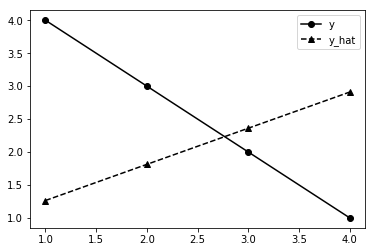

y_hat = [3.98770143 2.99065309 1.99360475 0.9965564 ]


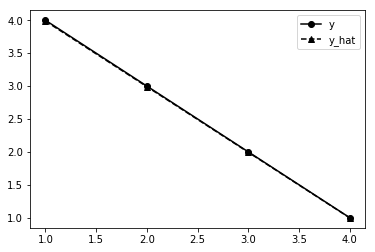

after w = [-1.] b = [4.98]


In [3]:
np.random.seed(0)

# x, y 지정
x = np.array((1,2,3,4))
y = np.array((4,3,2,1))

# w, b 임의의 값으로 초기화
w = np.random.rand(1)
b = np.random.rand(1)

# 학습전 w와 b y_hat 출력
y_hat = w * x + b 
print("before w = {} b = {} y_hat = {} ".format(np.round(w,2),np.round(b,2),np.round(y_hat,1)))

# 학습률 정의
alpha = 0.1

# 학습전 y_hat 출력
y_hat = w * x + b
plt.plot(x,y,'-ok',label = 'y')
plt.plot(x,y_hat,'--^k', label = 'y_hat')
plt.legend(loc='upper right')
plt.show()

#반복
while(True):
    # 4개 데이터의 에러의 합 저장
    delta = 0
    # 모든 x에 대해서 y_hat 계산 반복
    for i in range(len(x)):
        # 단층 퍼셉트론 출력 계산
        y_hat = w * x[i] + b
        # 오차 계산
        E = 0.5*(y[i] - y_hat)**2
        # 오차에 대한 기여율 계산
        # w, b 학습
        de = -(y[i] - y_hat)
        dw = de * x[i]
        w = w - alpha * dw
        db = de
        b = b - alpha * db        
        delta = np.max([delta, E])
            
    if delta < 0.0001:
        break

y_hat = w * x + b
print("y_hat = {}".format(y_hat))
plt.plot(x,y,'-ok',label = 'y')
plt.plot(x,y_hat,'--^k', label = 'y_hat')
plt.legend(loc='upper right')
plt.show()

print("after w = {} b = {}".format(np.round(w,2),np.round(b,2)))

### sin(x) 학습

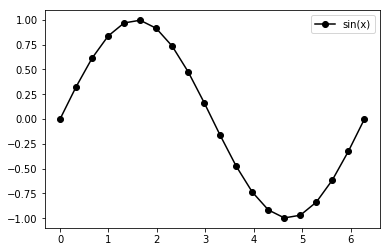

before w = [0.55] b = [0.72] 



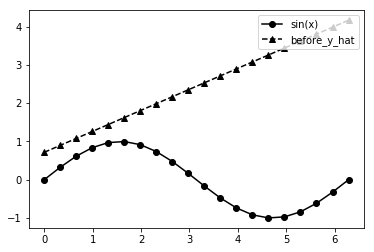

100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2546.75it/s]


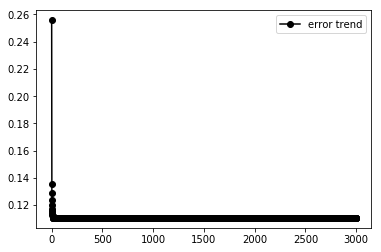

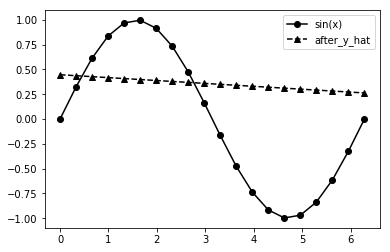

after w = [-0.03] b = [0.45]


In [6]:
np.random.seed(0)

# 훈련용 x, y 지정
n = 20
train_x = np.linspace(0,np.pi*2,n)
train_y = np.sin(train_x)

# 테스트용 x, y 지정
n = 60
test_x = np.linspace(0,np.pi*2,n)
test_y = np.sin(test_x)

# 학습용 데이터 출력
plt.plot(train_x,train_y,'-ok',label = 'sin(x)')
plt.legend(loc='upper right')
plt.show()

# w, b 임의의 값으로 초기화
w = np.random.rand(1)
b = np.random.rand(1)

# 학습전 w와 b y_hat 출력
print("before w = {} b = {} ".format(np.round(w,2),np.round(b,2)))
print()

# 학습전 y_hat 출력
y_hat = w * train_x + b
plt.plot(train_x,train_y,'-ok',label = 'sin(x)')
plt.plot(train_x,y_hat,'--^k', label = 'before_y_hat')
plt.legend(loc='upper right')
plt.show()


# 학습률 정의
alpha = 0.1

# 학습 과정을 저장하기 위한 리스트
error_trend = []


#반복
for batch in tqdm(range(3000)):
    # 4개 데이터의 에러의 합 저장
    delta = 0
    sum_e = 0
    # 모든 x에 대해서 y_hat 계산 반복
    for i in range(len(train_x)):
        # y_hat 계산
        y_hat = w * train_x[i] + b
        # 오차 계산
        E = 0.5*(train_y[i] - y_hat)**2

       # w, b 갱신
        e = -(train_y[i] - y_hat)
        dw = e * train_x[i]
        w = w - alpha * dw
        db = e
        b = b - alpha * e
        
        delta = np.max([delta, E])
            
    error_trend.append(delta)


plt.plot(error_trend, '-ok', label = 'error trend')
plt.legend(loc='upper right')
plt.show()

y_hat = w * train_x + b
plt.plot(train_x,train_y,'-ok',label = 'sin(x)')
plt.plot(train_x,y_hat,'--^k', label = 'after_y_hat')
plt.legend(loc='upper right')
plt.show()

print("after w = {} b = {}".format(np.round(w,2),np.round(b,2)))

### 활성화 함수와 미분

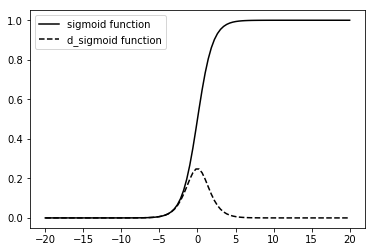

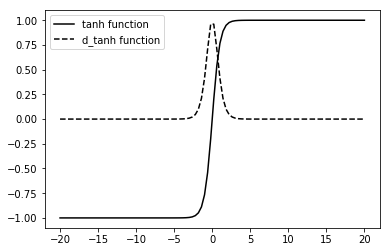

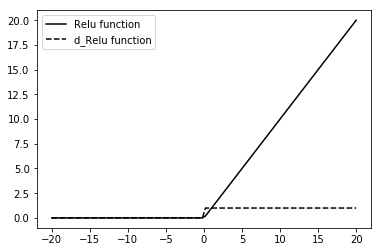

In [7]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1 + np.exp(-x))
# 시그모이드 함수 미분
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 하이퍼볼릭탄젠트
def tanh(x):
    return np.tanh(x)

# 하이퍼볼릭탄젠트 미분
def d_tanh(x):
    return 1 - tanh(x)**2

# Relu
def Relu(x):
    return x * (x>0)

# Relu 미분
def d_Relu(x):
    return 1 * (x>0)

x = np.linspace(-20,20,100)
y = sigmoid(x)
dy = d_sigmoid(x)
plt.plot(x,y,'-k',label = 'sigmoid function')
plt.plot(x,dy,'--k',label = 'd_sigmoid function')
plt.legend(loc='upper left')
plt.show()

y = tanh(x)
dy = d_tanh(x)
plt.plot(x,y,'-k',label = 'tanh function')
plt.plot(x,dy,'--k',label = 'd_tanh function')
plt.legend(loc='upper left')
plt.show()

y = Relu(x)
dy = d_Relu(x)
plt.plot(x,y,'-k',label = 'Relu function')
plt.plot(x,dy,'--k',label = 'd_Relu function')
plt.legend(loc='upper left')
plt.show()


### 비선형 함수 근사

Iteration = 1 error = 0.24074


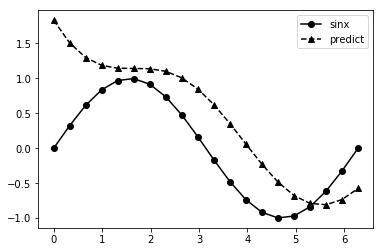

Iteration = 1000 error = 0.00638


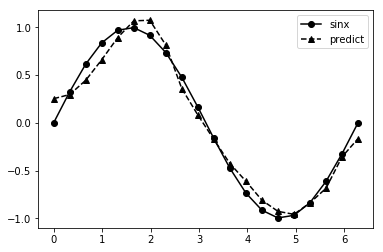

Iteration = 2000 error = 0.00183


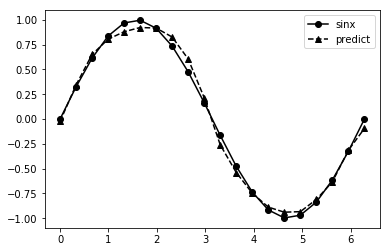

Iteration = 3000 error = 0.00511


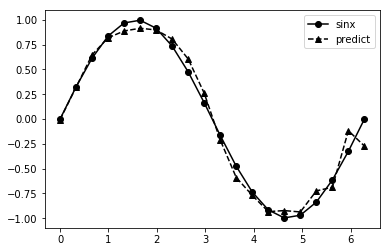

Iteration = 4000 error = 0.00027


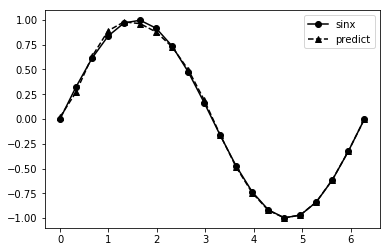

Iteration = 5000 error = 0.00016


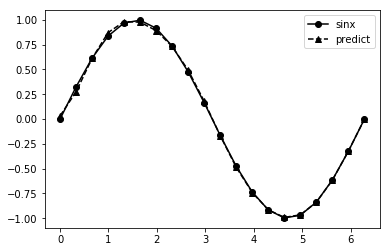

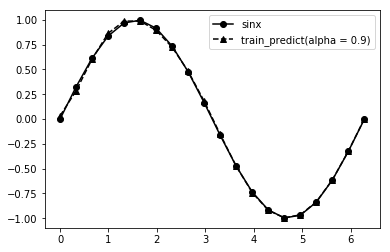

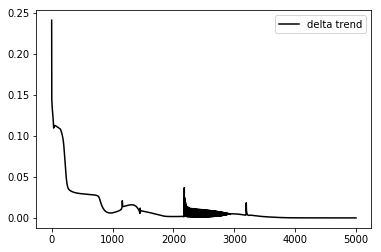

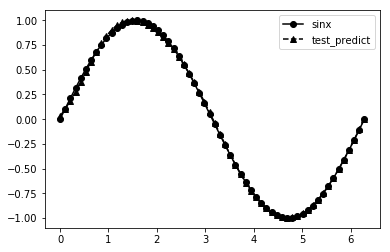

In [8]:
np.random.seed(0)

# 입력층 뉴런의 개수 정의
input_node = 1
# 중간층 뉴런의 개수 정의
hidden_node = 3
# 출력층 뉴런의 개수 정의
output_node = 1


# 훈련용 데이터 (x, y) : 0~2π 구간에서 20개 추출 
n_train = 20
train_x = np.linspace(0,np.pi*2,n_train)
train_y = np.sin(train_x)

# 테스트용 데이터 (x, y) : 0~2π 구간에서 60개 추출 
n_test = 60
test_x = np.linspace(0,np.pi*2,n_test)
test_y = np.sin(test_x)

# 학습률 지정
alpha = 0.1

# 최대 반복 횟수 지정
max_iter = 5001

# 학습 중간 결과를 표시하는 주기 설정
graph = 1000

# 𝒘1,𝒃1,𝒘2,𝒃2에 대해서 임의의 값으로 초기화
w1 = np.random.rand(hidden_node, input_node)
b1 = np.random.rand(hidden_node, 1)
w2 = np.random.rand(output_node, hidden_node)
b2 = np.random.rand(output_node, 1)

delta = []

# 최대 반복 횟수까지 반복
for iter in range(1, max_iter):
    # 오차를 저장할 리스트
    e_list = []
    # 중간 결과 그래프를 그리기 위해서 신경망의 출력을 저장하는 배열
    y_hat_list = np.zeros(n_train)
    #  모든 x∈𝑋에 대해서 
    for i in range(n_train):
        # 순전파 : 신경망의 출력 계산
        z1 = np.dot(w1, train_x[i].reshape(1,1)) + b1
        # 중간층의 출력은 시그모이드 함수 사용
        a1 = sigmoid(z1)
        z2 = np.dot(w2, a1) + b2
        # 출력층의 출력은 항등함수 y=x 사용
        y_hat = z2
        # 출력을 배열에 저장
        y_hat_list[i] = y_hat
        
        #오차 계산
        e = 0.5 * (train_y[i] - y_hat) ** 2
        e_list.append(e)
        
        #역전파 : 가중치, 편향 학습
        dy = -(train_y[i] - y_hat)
        dz2 = 1
        dw2 = a1.T
        delta_w2 = dy * dz2 * dw2
        delta_b2 = dy * dz2
        
        da1 = w2.T
        dz1 = d_sigmoid(z1)
        dw1 = train_x[i].T
        delta_w1 = dy * dz2 * da1 * dz1 * dw1
        delta_b1 = dy * dz2 * da1 * dz1
        
        # 역전파
        w2 -= alpha * delta_w2
        b2 -= alpha * delta_b2
        w1 -= alpha * delta_w1
        b1 -= alpha * delta_b1

    
    if iter == 1 or iter % graph == 0:
        print("Iteration = {} error = {}".format(iter, np.round(np.mean(e_list),5)))
        plt.plot(train_x,train_y, '-ok', label = 'sinx')
        plt.plot(train_x,y_hat_list, '--^k', label = 'predict')
        plt.legend(loc = 'upper right')
        plt.show()
        
    delta.append(np.mean(e_list))
    

# 훈련 데이터를 입력으로 신경망 출력 계산
z1 = np.dot(w1, train_x.reshape(1,len(train_x))) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
y_hat = z2    

# 훈련 데이터의 그래프 출력
plt.plot(train_x,train_y, '-ok', label = 'sinx')
plt.plot(train_x,y_hat[0], '--^k', label = 'train_predict(alpha = 0.9)')
plt.legend(loc = 'upper right')
plt.show()

# 오차 트렌드 표시
plt.plot(delta,'-k', label = 'delta trend')
plt.legend(loc = 'upper right')
plt.show()

# 테스트 데이터를 입력으로 신경망 출력 계산
z1 = np.dot(w1, test_x.reshape(1,len(test_x))) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
y_hat = z2

# 테스트 데이터 y와 신경망의 출력 비교
plt.plot(test_x,test_y, '-ok', label = 'sinx')
plt.plot(test_x,y_hat[0], '--^k', label = 'test_predict')
plt.legend(loc = 'upper right')
plt.show()



### 케라스로 간단한 NN 정의하기

In [9]:
# Sequential API 를 이용하기 위한 모듈 임포트
from keras.models import Sequential
# 다층 퍼셉트론의 층(Layer)을 정의하기위한 모듈 임포트
from keras.layers import Dense
# 확률적 경사하강법 모듈 임포트
from keras.optimizers import SGD

# 케라스 모델 초기화
model = Sequential()
input_node = 1
hidden1_node = 3
output_node =1
model.add(Dense(hidden1_node, input_dim=input_node, activation='sigmoid', name='hidden_layer'))
model.add(Dense(output_node, name='output_layer'))
print(model.summary())


C:\Users\mingk\AppData\Local\conda\conda\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 3)                 6         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


### 신경망으로 sin(x) 학습 with 케라스

sgd
momentum
RMSProp
Adam


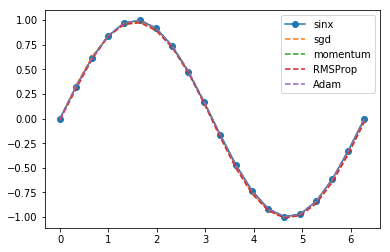

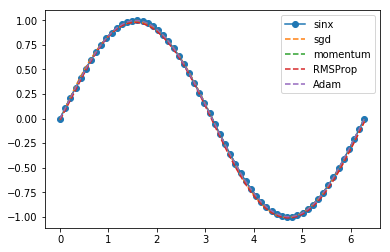

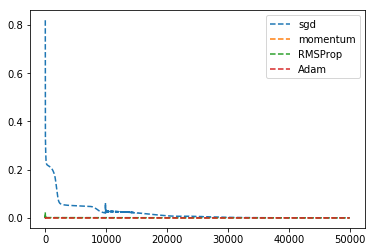

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam
from keras import metrics

np.random.seed(0)
# 훈련용 데이터를 생성한 후 케라스의 입력에 맞게 차원을 수정 (샘플 개수, 입력 개수)
train_x = np.linspace(0,np.pi*2,20).reshape(20,1)
# 훈련용 정답데이터
train_y = np.sin(train_x)
# 테스트용 데이터를 생성한 후  생성후 케라스의 입력에 맞게 차원을 수정 (샘플 개수, 입력 개수)
test_x = np.linspace(0,np.pi*2,60).reshape(60,1)
# 테스트용 정답데이터
test_y = np.sin(test_x)

# 입력층의 뉴런 수
input_node = 1
# 중간층의 뉴런 수
hidden1_node = 3
# 출력층의 뉴런 수
output_node =1

# 케라스 모델 초기화
model = Sequential()

#중간층 생성 : 입력 1개, 중간층 뉴런 3개
model.add(Dense(hidden1_node, input_dim=input_node, activation='sigmoid'))

#출력층 생성 : 출력 1개
model.add(Dense(output_node))

#4가지 (sgd, momentum, RMSprop, Adam) 최적화 방법 딕셔너리로 정의
optimizer_option = {'sgd':SGD(lr=0.1),'momentum':SGD(lr=alpha, momentum=0.9),'RMSProp':RMSprop(lr=0.01),'Adam':Adam(lr=0.01)}

# 최적화 방법별 학습 진행 과정을 저장
result = []
# 최적화 방법 별 훈련데이터 결과를 저장
train_y_hat = []
# 최적화 방법 별 테스트데이터 결과를 저장
test_y_hat = []

for optimizer_name, optimizer_setting in optimizer_option.items():
    print(optimizer_name)
    # 4가지 방법으로 최적화 설정, 손실함수 설정
    model.compile(optimizer = optimizer_setting, loss = 'mean_squared_error', metrics=['mse'])
    # 학습 실행
    hist = model.fit(train_x, train_y, epochs = 50000, verbose = 0)
    # 학습 진행 과정을 저장
    result.append(hist)
    # 학습된 신경망 모델에 훈련데이터를 입력
    train_result = model.predict(train_x)    
    # 출력된 결과를 저장
    train_y_hat.append(train_result)
    # 학습된 신경망 모델에 테스트데이터를 입력
    test_result = model.predict(test_x)
    # 출력된 결과를 저장
    test_y_hat.append(test_result)

    
# 혼련 데이터 결과 확인
plt.plot(train_x,train_y, '-o', label = 'sinx')
for i, j in enumerate(optimizer_option.keys()):
    plt.plot(train_x,train_y_hat[i], '--', label = j)
plt.legend(loc = 'upper right')
plt.show()

# 테스트 데이터 결과 확인
plt.plot(test_x,test_y, '-o', label = 'sinx')
for i, j in enumerate(optimizer_option.keys()):
    plt.plot(test_x,test_y_hat[i], '--', label = j)
plt.legend(loc = 'upper right')
plt.show()


# 손실 함수 트렌드 확인
for i, j in enumerate(optimizer_option.keys()):
    plt.plot(result[i].history['loss'], '--', label = j)
plt.legend(loc = 'upper right')
plt.show()



### 두개의 중간층을 가지는 신경망

In [11]:
# 입력층의 뉴런 개수
input_node = 1
# 첫 번째 중간층의 뉴런 개수
hidden1_node = 3
# 두 번째 중간층의 뉴런 개수
hidden2_node = 2
# 출력층의 뉴런 개수
output_node =2
model = Sequential()
model.add(Dense(hidden1_node, input_dim=input_node, activation='sigmoid', name='hidden_layer1'))
model.add(Dense(hidden2_node, activation='tanh', name='hidden_layer2'))
model.add(Dense(output_node, name='output_layer'))
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 3)                 6         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 2)                 8         
_________________________________________________________________
output_layer (Dense)         (None, 2)                 6         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
None


### 합성곱 연산과 피처맵 추출

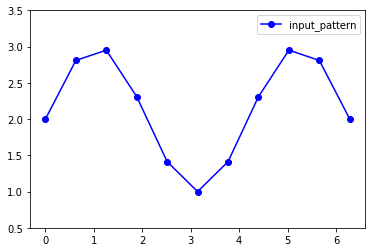

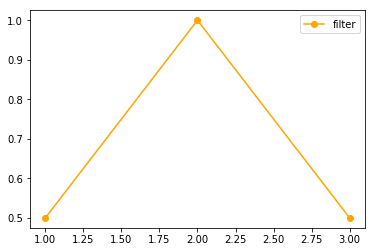

2.0 * 0.5 + 2.8 * 1.0+3.0*0.5=5.3


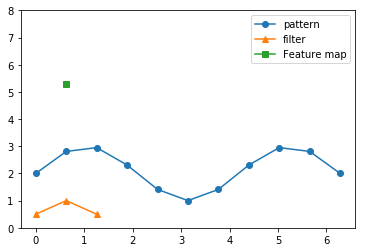

2.8 * 0.5 + 3.0 * 1.0+2.3*0.5=5.5


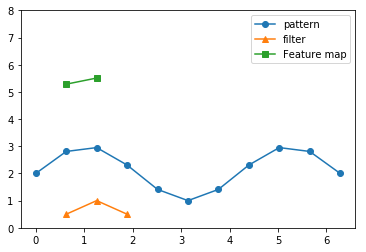

3.0 * 0.5 + 2.3 * 1.0+1.4*0.5=4.5


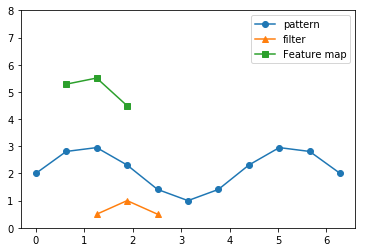

2.3 * 0.5 + 1.4 * 1.0+1.0*0.5=3.1


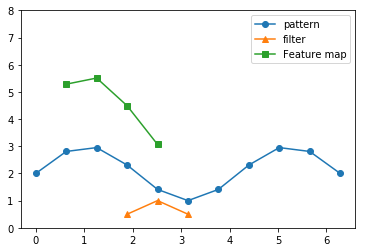

1.4 * 0.5 + 1.0 * 1.0+1.4*0.5=2.4


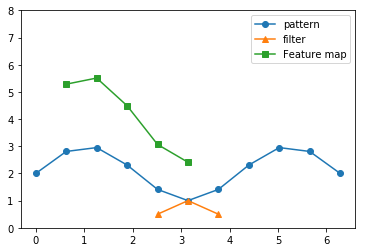

1.0 * 0.5 + 1.4 * 1.0+2.3*0.5=3.1


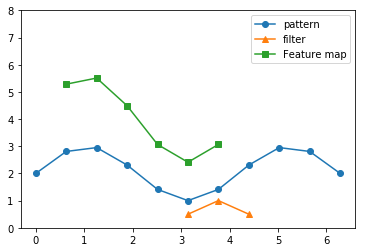

1.4 * 0.5 + 2.3 * 1.0+3.0*0.5=4.5


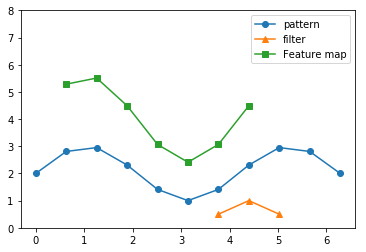

2.3 * 0.5 + 3.0 * 1.0+2.8*0.5=5.5


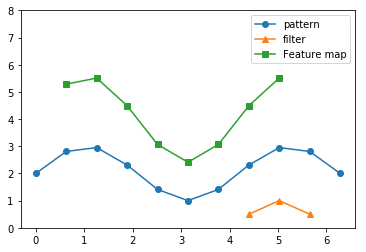

3.0 * 0.5 + 2.8 * 1.0+2.0*0.5=5.3


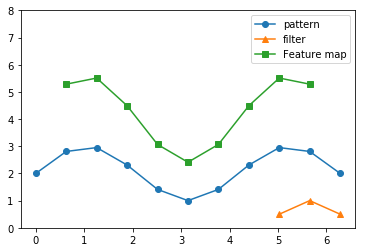

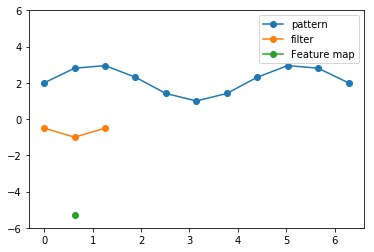

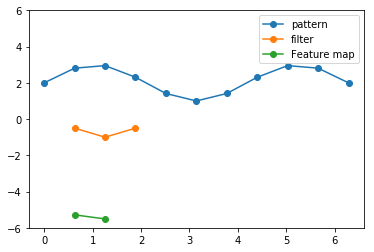

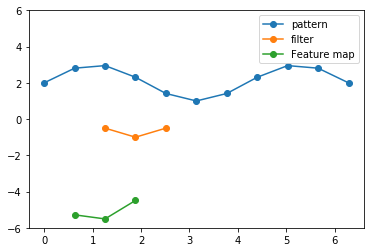

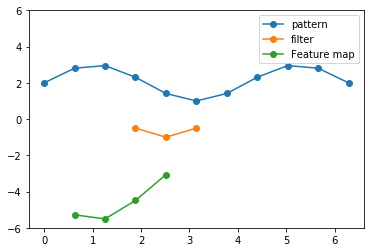

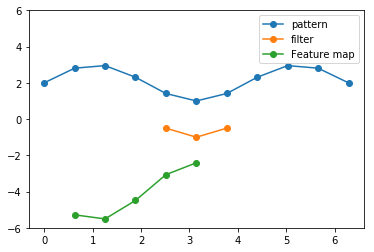

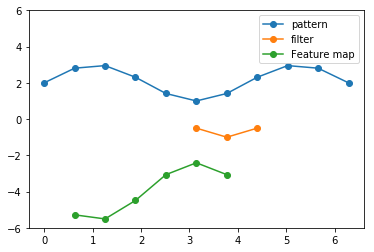

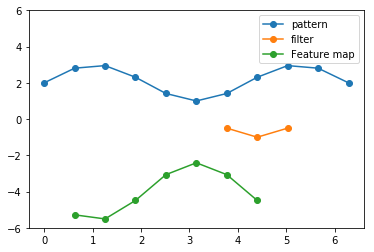

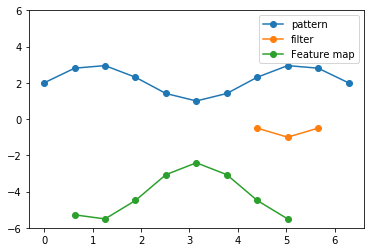

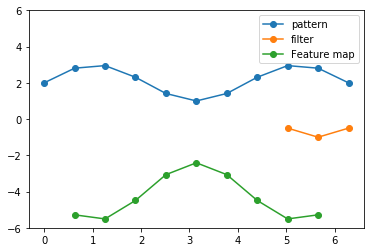

In [12]:
x = np.linspace(0,np.pi*2,11)
y = np.sin(1.5*x)+2

plt.plot(x,y,'-ob',label='input_pattern')
plt.legend(loc='upper right')
plt.ylim(0.5,3.5)
plt.show()
    
    
filter1 = np.array((0.5,1,0.5))

plt.plot((1,2,3),filter1,'-o',color='orange', label='filter')
plt.legend(loc='upper right')
# plt.ylim(1,3.5)
plt.show()


filter2 = np.array((-0.5,-1,-0.5))

feature_map1 = []
feature_map2 = []

for i in range(0, len(x)-2):
    result = np.sum(y[i:i+3]*filter1)
    print("{} * {} + {} * {}+{}*{}={}".format(np.round(y[i],1),np.round(filter1[0],1), 
                                          np.round(y[i+1],1),np.round(filter1[1],1), 
                                        np.round(y[i+2],1),np.round(filter1[2],1),np.round(result,1)))
    feature_map1.append(result)
    
    plt.plot(x,y,'-o',label='pattern')
    plt.plot(x[i:i+3],filter1,'-^',label='filter')
    plt.plot(x[1:1+i+1],feature_map1,'-s',label='Feature map')
    plt.legend(loc='upper right')
    plt.ylim(0,8)
    plt.show()
    
for i in range(0, len(x)-2):
    result = np.sum(y[i:i+3]*filter2)
    feature_map2.append(result)
    plt.plot(x,y,'-o',label='pattern')
    plt.plot(x[i:i+3],filter2,'-o',label='filter')
    plt.plot(x[1:1+i+1],feature_map2,'-o',label='Feature map')
    plt.legend(loc='upper right')
    plt.ylim(-6,6)
    plt.show()

### 2차원 필터 적용

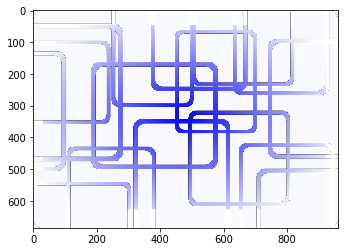

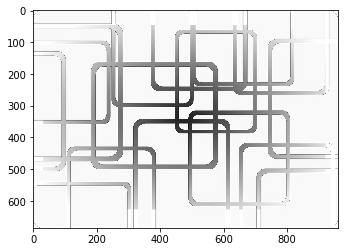

x.shape = (685, 960) 
height = 685 width = 960
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 683, 958, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
model summary = None
초기 필터 = [[[ 0.30922258]
  [-0.3289569 ]
  [ 0.14849174]]

 [[-0.18623263]
  [ 0.5459075 ]
  [-0.3741553 ]]

 [[ 0.06599474]
  [-0.07871684]
  [ 0.32530367]]]
세로 에지


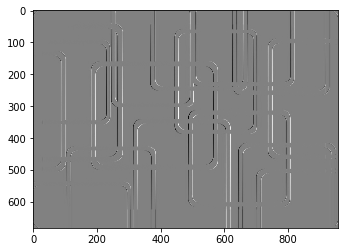

out_reshape.shape = (683, 958) 
가로 에지


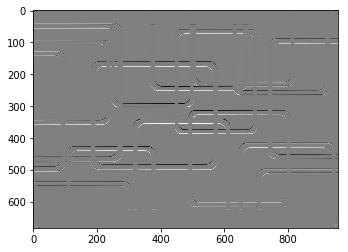

out_reshape.shape = (683, 958) 
Laplacian 에지


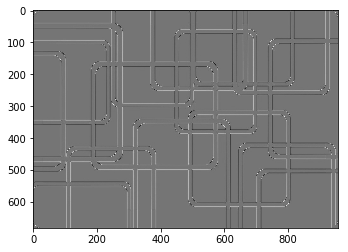

out_reshape.shape = (683, 958) 
right down 에지


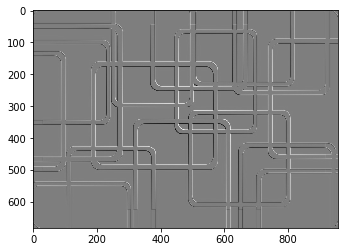

out_reshape.shape = (683, 958) 
left down 에지


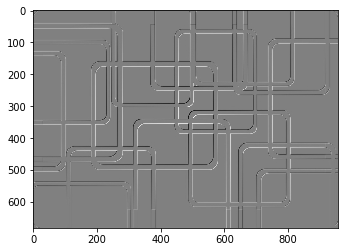

out_reshape.shape = (683, 958) 


In [13]:
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def show(model, img):
    out = model.predict(img)
    out_reshape =out.reshape(out.shape[1], out.shape[2])
    plt.imshow(out_reshape, cmap='gray' )
    plt.show()
    print("out_reshape.shape = {} ".format(out_reshape.shape))

img_color = Image.open('./image/circuit.jpg')
plt.imshow(img_color)
plt.show()

img_gray = img_color.convert('L')
plt.imshow(img_gray)
plt.show()

x = np.array(img_gray)
print("x.shape = {} ".format(x.shape))

h = x.shape[0]
w = x.shape[1]

print("height = {} width = {}".format(h,w))

input_image = x.reshape(1,h,w,1)

model = Sequential()
model.add(Conv2D(1, (3,3),padding='valid', input_shape = (h,w,1)))
# MaxPooling2D(pool_size=(2,2))
print("model summary = {}".format(model.summary()))

filter = model.layers[0].get_weights()[0][:,:,0,:]
print("초기 필터 = {}".format(filter))


# 세로 에지
print("세로 에지")
model.set_weights([np.array([[[[-1]],[[0]],[[1]]],
                              [[[-2]],[[0]],[[2]]],
                              [[[-1]],[[0]],[[1]]]]),np.array([0])])
show(model, input_image)

# 가로 에지
print("가로 에지")
model.set_weights([np.array([[[[-1]],[[-2]],[[-1]]],
                              [[[0]],[[0]],[[0]]],
                              [[[1]],[[2]],[[1]]]]),np.array([0])])
show(model, input_image)

# Laplacian 에지
print("Laplacian 에지")
model.set_weights([np.array([[[[0]],[[1]],[[0]]],
                              [[[1]],[[-4]],[[1]]],
                              [[[0]],[[1]],[[0]]]]),np.array([0])])
show(model, input_image)

# right down
print("right down 에지")
model.set_weights([np.array([[[[0]],[[1]],[[2]]],
                              [[[-1]],[[0]],[[1]]],
                              [[[-2]],[[-1]],[[0]]]]),np.array([0])])
show(model, input_image)

# left down 에지
print("left down 에지")
model.set_weights([np.array([[[[-2]],[[-1]],[[0]]],
                              [[[-1]],[[0]],[[1]]],
                              [[[0]],[[1]],[[2]]]]),np.array([0])])
show(model, input_image)

### 손글씨 데이터(MNIST data)

1. 훈련 데이터 x_train 의 크기 : (60000, 28, 28, 1)
2. 훈련 데이터 y_train 의 크기 : (60000,)
3. 테스트 데이터 x_test 의 크기 : (10000, 28, 28, 1)
4. 테스트 데이터 y_test 의 크기 : (10000,)
5. x_train 5개의 이미지


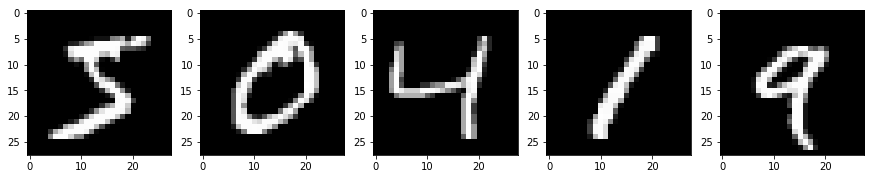

6. 훈련 데이터 y_train에 저장된 내용(위 5개 이미지의 정답) : [5 0 4 1 9]


In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print("1. 훈련 데이터 x_train 의 크기 : {}".format(x_train.shape))
print("2. 훈련 데이터 y_train 의 크기 : {}".format(y_train.shape))
print("3. 테스트 데이터 x_test 의 크기 : {}".format(x_test.shape))
print("4. 테스트 데이터 y_test 의 크기 : {}".format(y_test.shape))
print("5. x_train 5개의 이미지")
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray' )
plt.show()
print("6. 훈련 데이터 y_train에 저장된 내용(위 5개 이미지의 정답) : {}".format(y_train[:5]))

### 손글씨 데이터 전처리

In [17]:
print("1-1. 정규화 전 훈련 데이터 x_train의 최소값 {}, 최대값 {}".format(np.min(x_train),np.max(x_train)))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("1-2. 정규화 후 훈련 데이터 x_train의 최소값 {}, 최대값 {}".format(np.min(x_train),np.max(x_train)))
print("2-1. 원-핫 인코딩후 첫 번째 y_train에 저장된 내용 : {}".format(y_train[0]))
print("2-2. 원-핫 인코딩후 두 번째 y_train에 저장된 내용 : {}".format(y_train[1]))

1-1. 정규화 전 훈련 데이터 x_train의 최소값 0.0, 최대값 1.0
1-2. 정규화 후 훈련 데이터 x_train의 최소값 0.0, 최대값 0.003921568859368563
2-1. 원-핫 인코딩후 첫 번째 y_train에 저장된 내용 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
2-2. 원-핫 인코딩후 두 번째 y_train에 저장된 내용 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 합성곱신경망 구축

In [18]:
np.random.seed(0)
model = Sequential()
model.add(Conv2D(2, kernel_size=(3, 3),activation='relu',input_shape=input_shape, name='Conv2D_layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_layer'))
model.add(Flatten(name='Flatten_layer'))
model.add(Dense(128, activation='relu', name='Dense1_layer'))
model.add(Dense(num_classes, activation='softmax', name='Dense2_layer'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_layer (Conv2D)        (None, 26, 26, 2)         20        
_________________________________________________________________
MaxPooling2D_layer (MaxPooli (None, 13, 13, 2)         0         
_________________________________________________________________
Flatten_layer (Flatten)      (None, 338)               0         
_________________________________________________________________
Dense1_layer (Dense)         (None, 128)               43392     
_________________________________________________________________
Dense2_layer (Dense)         (None, 10)                1290      
Total params: 44,702
Trainable params: 44,702
Non-trainable params: 0
_________________________________________________________________
None


### 손글씨 학습과 결과 확인

Filter 0 :
[[ 0.05 -0.08 -0.06]
 [-0.34 -0.31 -0.06]
 [ 0.08  0.09 -0.44]]

Filter 1 :
[[ 0.47 -0.36  0.08]
 [ 0.19 -0.05 -0.08]
 [ 0.44  0.42 -0.11]]

before_bias
[0. 0.]

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 2.1189 - acc: 0.2693 - val_loss: 1.0386 - val_acc: 0.7530
Epoch 2/10
 - 6s - loss: 0.5344 - acc: 0.8551 - val_loss: 0.3717 - val_acc: 0.8938
Epoch 3/10
 - 6s - loss: 0.3565 - acc: 0.8968 - val_loss: 0.3184 - val_acc: 0.9073
Epoch 4/10
 - 6s - loss: 0.3145 - acc: 0.9073 - val_loss: 0.2848 - val_acc: 0.9153
Epoch 5/10
 - 6s - loss: 0.2845 - acc: 0.9163 - val_loss: 0.2545 - val_acc: 0.9257
Epoch 6/10
 - 6s - loss: 0.2583 - acc: 0.9239 - val_loss: 0.2339 - val_acc: 0.9314
Epoch 7/10
 - 6s - loss: 0.2352 - acc: 0.9308 - val_loss: 0.2102 - val_acc: 0.9371
Epoch 8/10
 - 7s - loss: 0.2156 - acc: 0.9370 - val_loss: 0.1962 - val_acc: 0.9414
Epoch 9/10
 - 6s - loss: 0.1990 - acc: 0.9408 - val_loss: 0.1826 - val_acc: 0.9467
Epoch 10/10
 - 6s - loss: 0.18

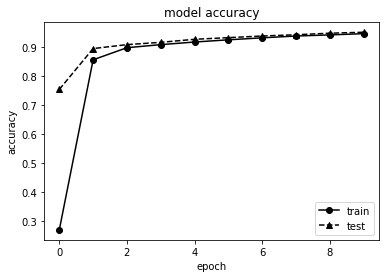

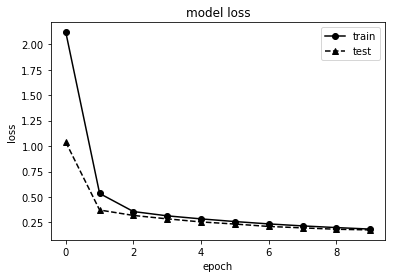


after_weight
Filter 0 :
[[ 0.05 -0.08 -0.06]
 [-0.34 -0.31 -0.06]
 [ 0.08  0.09 -0.44]]

Filter 1 :
[[5.98 6.51 5.85]
 [8.25 9.52 7.34]
 [7.24 7.95 5.49]]

after_bias
[-0.  0.]


In [19]:
batch_size = 128
epochs = 10
before_weight, before_bias = model.layers[0].get_weights()
print("Filter 0 :")
print(np.round(before_weight[:,:,0,0],2))
print()
print("Filter 1 :")
print(np.round(before_weight[:,:,0,1],2))
print()
print("before_bias")
print(np.round(before_bias,2))
print()

hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=2,
                 validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss : {}' .format(np.round(score[0],3)))
print('Test accuracy : {}' .format(np.round(score[1],3)))
weight_after, bias_after = model.layers[0].get_weights()

fig = plt.figure()
# plt.subplot(2,1,1)
plt.plot(hist.history['acc'],'-ok')
plt.plot(hist.history['val_acc'],'--^k')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
# plt.subplot(2,1,2)
plt.show()
plt.plot(hist.history['loss'],'-ok')
plt.plot(hist.history['val_loss'],'--^k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.tight_layout()
plt.show()
print()
after_weight, after_bias = model.layers[0].get_weights()
print("after_weight")
print("Filter 0 :")
print(np.round(after_weight[:,:,0,0],2))
print()
print("Filter 1 :")
print(np.round(after_weight[:,:,0,1],2))
print()
print("after_bias")
print(np.round(after_bias,2))


### 정확률 99.25% 모델

In [20]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dro

### 필터 학습 전후 비교

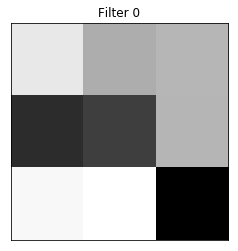

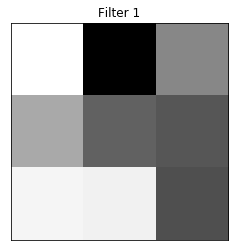

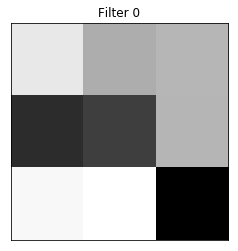

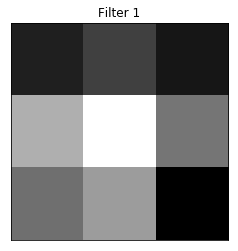

In [21]:
def show(filter,i):
    plt.imshow(filter, cmap='gray' )
    plt.title("Filter {}".format(i))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

# 학습전 Filter 0번 그리기
filter = before_weight[:,:,0,0]
show(filter,0)

# 학습전 Filter 1번 그리기
filter = before_weight[:,:,0,1]
show(filter,1)

# 학습후 Filter 0번 그리기
filter = after_weight[:,:,0,0]
show(filter,0)

# 학습후 Filter 1번 그리기
filter = after_weight[:,:,0,1]
show(filter,1)


### 필터에 콜로세움 통과하기

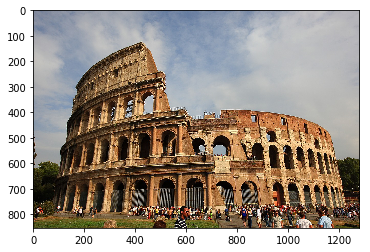

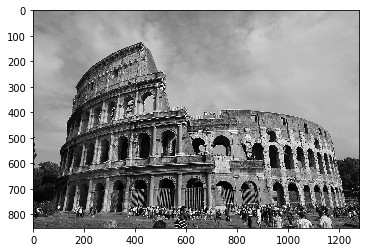

x.shape = (853, 1280) 
height = 853 width = 1280
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 851, 1278, 1)      10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
model summary = None
Filter 0 :


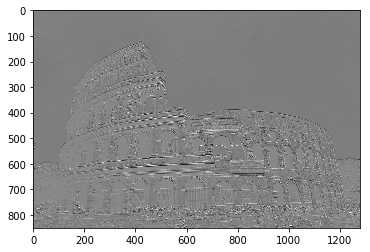

out_reshape.shape = (851, 1278) 
Filter 1 :


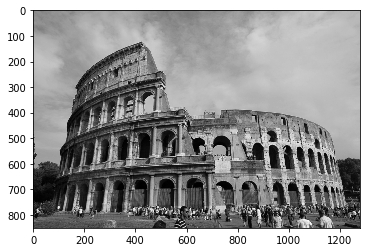

out_reshape.shape = (851, 1278) 


In [22]:
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


def show(model, img):
    out = model.predict(img)
    out_reshape =out.reshape(out.shape[1], out.shape[2])
    plt.imshow(out_reshape, cmap='gray' )
    plt.show()
    print("out_reshape.shape = {} ".format(out_reshape.shape))


img_color = Image.open('./image/col.jpg')
plt.imshow(img_color)
plt.show()

img_gray = img_color.convert('L')
plt.imshow(img_gray)
plt.show()

x = np.array(img_gray)
print("x.shape = {} ".format(x.shape))

h = x.shape[0]
w = x.shape[1]

print("height = {} width = {}".format(h,w))

input_image = x.reshape(1,h,w,1)

model = Sequential()
model.add(Conv2D(1, (3,3),padding='valid', input_shape = (h,w,1)))
# MaxPooling2D(pool_size=(2,2))
print("model summary = {}".format(model.summary()))

# Filter 0번으로 가중치 설정
print("Filter 0 :")
model.set_weights([np.array([[[[-0.82]],[[-1.19]],[[-0.66]]],
                              [[[0.13]],[[-0.54]],[[-0.89]]],
                              [[[1.33]],[[1.59]],[[0.61]]]]),np.array([0])])
show(model, input_image)

# Filter 1번으로 가중치 설정
print("Filter 1 :")
model.set_weights([np.array([[[[0.49]],[[0.17]],[[0.21]]],
                              [[[0.77]],[[0.98]],[[0.28]]],
                              [[[0.99]],[[1.05]],[[0.13]]]]),np.array([0])])
show(model, input_image)